In [138]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')                   

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
import datetime
import dateutil
import matplotlib.dates as mdates
matplotlib.style.use('ggplot')
%matplotlib inline



##This report analyzes data from Centers for Medicare and Medicaid (CMS). This data has made available via CMS's website in CVS file format, and is de-identified Medicare claims data. These files contain non-identifiable claim-specific information and are within the public domain. 

In [86]:
pwd

'P:\\Development\\Angela\\Synthetic claims data\\DE1_0_2008_to_2010_Inpatient_Claims_Sample_1'

In [87]:
cd P:\Development\Angela\Synthetic claims data\DE1_0_2008_Beneficiary_Summary_File_Sample_1


P:\Development\Angela\Synthetic claims data\DE1_0_2008_Beneficiary_Summary_File_Sample_1


In [88]:
# Read in CSV file, parse birth and death dates, place into dataframe 1
df1=pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv', parse_dates=['BENE_BIRTH_DT',
                                                  'BENE_DEATH_DT'])


In [89]:
cd P:\Development\Angela\Synthetic claims data\DE1_0_2009_Beneficiary_Summary_File_Sample_1

P:\Development\Angela\Synthetic claims data\DE1_0_2009_Beneficiary_Summary_File_Sample_1


In [90]:
# Read in CSV file, parse birth and death dates, place into dataframe 2
df2=pd.read_csv('DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv', parse_dates=['BENE_BIRTH_DT',
                                                  'BENE_DEATH_DT'])

In [91]:
cd P:\Development\Angela\Synthetic claims data\DE1_0_2010_Beneficiary_Summary_File_Sample_1

P:\Development\Angela\Synthetic claims data\DE1_0_2010_Beneficiary_Summary_File_Sample_1


In [92]:
# Read in CSV file, parse birth and death dates, place into dataframe 3
df3=pd.read_csv('DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv', parse_dates=['BENE_BIRTH_DT',
                                                  'BENE_DEATH_DT'])

In [93]:
# Place all summary dataframes into cancer universe except outpatient file
cancer = [df1,df2,df3]

In [94]:
# Concatenate and join summary and inpatient dataframes 
cancer =  pd.concat([df1,df2,df3])

In [96]:
# Replace variables in dataset (gender)
cancer.replace({'BENE_SEX_IDENT_CD':{1: 'M', 2: 'F'}}, inplace=True)

In [97]:
# Replace variables in dataset (cancer)
cancer.replace ({'SP_CNCR':{1:'Y', 2:'N'}}, inplace=True)

In [98]:
# Replace variables in dataset (race)
cancer.replace ({'BENE_RACE_CD':{1: 'White', 2: 'Black', 3: 'Others', 5: 'Hispanic'}}, inplace=True)

In [99]:
# Replace variables in dataset (end stage renal disease)
cancer.replace ({'BENE_ESRD_IND':{'0': 'does not', 'Y': 'does'}}, inplace=True)

In [100]:
# Replace state codes 1-9 as a single digit string

cancer.replace({'STATE_CODE_STRING':{'1': '01',
                                       '2': '02',
                                       '3': '03',
                                       '4': '04',
                                       '5': '05',
                                       '6': '06',
                                       '7': '07',
                                       '8': '08',
                                       '9': '09'}},inplace=True)

In [101]:
#replace county codes as 3 digits because it will need to be attached to state code

cancer.replace({'COUNTY_CODE_STRING':{'0':'000',
                                        '1':'001',
                                        '10':'010',
                                        '20':'020',
                                        '30':'030',
                                        '60':'060',
                                        '90':'090',
                                        '40':'040',
                                        '50':'050',
                                        '70':'070',
                                        '80':'080',
                                        '11':'011',
                                        '25':'025',
                                        '88':'088',
                                        '55':'055',
                                        '34':'034',
                                        '84':'084',
                                        '14':'014'}},inplace=True)

In [102]:
#replace variables in dataset (state code)

cancer.replace({'SP_STATE_CODE':{1: 'AL',
                                   2: 'AK',
                                   3: 'AZ',
                                   4: 'AR',
                                   5: 'CA',
                                   6: 'CO',
                                   7: 'CT',
                                   8: 'DE',
                                   9: 'DC',
                                   10: 'FL',
                                   11: 'GA',
                                   12: 'HI',
                                   13: 'ID',
                                   14: 'IL',
                                   15: 'IN',
                                   16: 'IA',
                                   17: 'KS',
                                   18: 'KY',
                                   19: 'LA',
                                   20: 'ME',
                                   21: 'MD',
                                   22: 'MA',
                                   23: 'MI',
                                   24: 'MN',
                                   25: 'MS',
                                   26: 'MO',
                                   27: 'MT',
                                   28: 'NE',
                                   29: 'NV',
                                   30: 'NH',
                                   31: 'NJ',
                                   32: 'NM',
                                   33: 'NY',
                                   34: 'NC',
                                   35: 'ND',
                                   36: 'OH',
                                   37: 'OK',
                                   38: 'OR',
                                   39: 'PA',
                                   41: 'RI',
                                   42: 'SC',
                                   43: 'SD',
                                   44: 'TN',
                                   45: 'TX',
                                   46: 'UT',
                                   47: 'VT',
                                   49: 'VA',
                                   50: 'WA',
                                   51: 'WV',
                                   52: 'WI',
                                   53: 'WY',
                                   54: 'Others'}}, inplace=True)

In [103]:
# replaces variables in dataset (alzheimer, chronic condition-heart failure, chronic condition-kidney disease, COPD, chronic condition-depression, 
# diabetes, ichemic heart disease, osteoporosis, rhuemtoid arthritis, stroke/transient Ischemic Attack)

cancer.replace({'SP_ALZHDMTA':{1:'Y',
                          2:'N'}}, inplace=True)                       

cancer.replace({'SP_CHF':{1:'Y',
                          2:'N'}}, inplace=True)   


cancer.replace({'SP_CHRNKIDN':{1:'Y',
                          2:'N'}}, inplace=True)
                          
                          
cancer.replace({'SP_COPD':{1:'Y',
                          2:'N'}}, inplace=True)    
                          
cancer.replace({'SP_DEPRESSN':{1:'Y',
                          2:'N'}}, inplace=True)    
                        
   
cancer.replace({'SP_DIABETES':{1:'Y',
                          2:'N'}}, inplace=True)   
                       

cancer.replace({'SP_ISCHMCHT':{1:'Y',
                          2:'N'}}, inplace=True)   

cancer.replace({'SP_OSTEOPRS':{1:'Y',
                          2:'N'}}, inplace=True)  
                                                    
                          
cancer.replace({'SP_RA_OA':{1:'Y',
                          2:'N'}}, inplace=True) 


cancer.replace({'SP_STRKETIA':{1:'Y',
                          2:'N'}}, inplace=True)

###Total number of records contained in summary files

In [104]:
# Count of entire cancer dataframe
len(cancer.index)

343644

In [105]:
# Counts of birthdate
cancer['BENE_BIRTH_DT'].value_counts()


1942-10-01    1556
1939-04-01    1499
1940-03-01    1488
1941-04-01    1459
1939-10-01    1454
1941-10-01    1454
1941-05-01    1446
1943-11-01    1442
1943-07-01    1442
1939-03-01    1420
1939-06-01    1417
1943-06-01    1413
1943-09-01    1410
1943-10-01    1400
1941-08-01    1398
...
1979-06-01    27
1980-05-01    27
1981-10-01    27
1976-04-01    24
1978-04-01    24
1983-03-01    24
1979-08-01    24
1978-07-01    21
1974-01-01    21
1982-08-01    21
1974-04-01    21
1975-05-01    21
1982-01-01    18
1981-04-01    18
1979-01-01    15
Length: 900

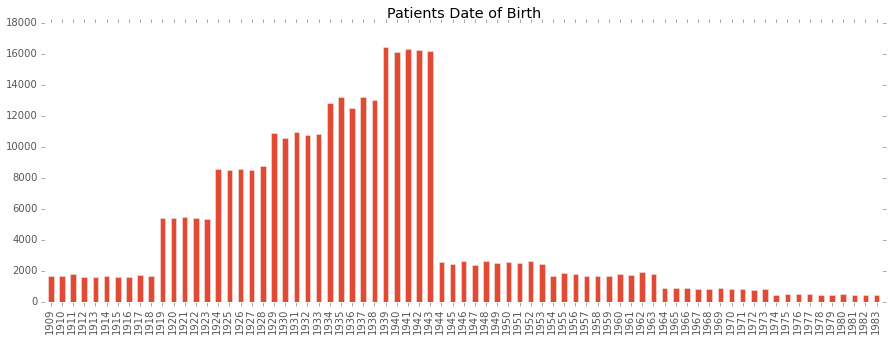

In [106]:
cancer['BENE_BIRTH_DT'].dt.year.value_counts().sort_index().plot(kind='bar',title= "Patients Date of Birth",figsize=(15,5))

In [107]:
#Counts of patient's sex
cancer['BENE_SEX_IDENT_CD'].value_counts()

F    190059
M    153585
dtype: int64

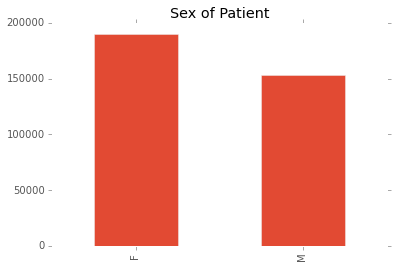

In [108]:
# Barchart of Sex of Patient
cancer['BENE_SEX_IDENT_CD'].value_counts().plot(kind='bar', title='Sex of Patient')

In [109]:
# Counts of patients with cancer diagnosis (yes has cancer, no does not have cancer)
cancer['SP_CNCR'].value_counts()

N    321160
Y     22484
dtype: int64

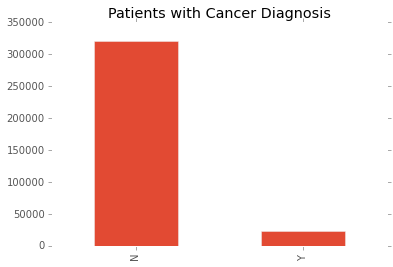

In [110]:
# Barchart of patients with cancer diagnosis
cancer['SP_CNCR'].value_counts().plot(kind='bar', title='Patients with Cancer Diagnosis')

In [111]:
# Counts of patient's race
cancer['BENE_RACE_CD'].value_counts()

White       284514
Black        36459
Others       14591
Hispanic      8080
dtype: int64

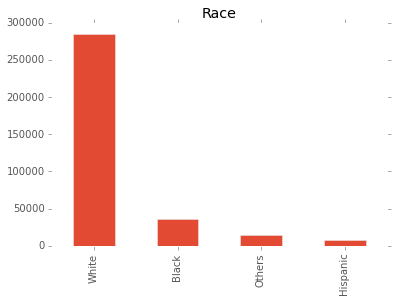

In [112]:
# Barchart of patient's race
cancer['BENE_RACE_CD'].value_counts().plot(kind='bar', title='Race')

In [113]:
# Contingency table of cancer and gender
pd.crosstab(cancer.BENE_SEX_IDENT_CD, cancer.SP_CNCR, margins=True)

SP_CNCR,N,Y,All
BENE_SEX_IDENT_CD,,,
F,177675,12384,190059
M,143485,10100,153585
All,321160,22484,343644


In [114]:
#Contingency table of cancer, gender and race
pd.crosstab([cancer.BENE_RACE_CD, cancer.BENE_SEX_IDENT_CD] , cancer.SP_CNCR, margins=True)

SP_CNCR                              N      Y     All
BENE_RACE_CD BENE_SEX_IDENT_CD                       
Black        F                   19276   1189   20465
             M                   15140    854   15994
Hispanic     F                    4156    217    4373
             M                    3533    174    3707
Others       F                    7451    369    7820
             M                    6477    294    6771
White        F                  146792  10609  157401
             M                  118335   8778  127113
All                             321160  22484  343644

In [117]:
cd P:\Development\Angela\Synthetic claims data\DE1_0_2008_to_2010_Inpatient_Claims_Sample_1

P:\Development\Angela\Synthetic claims data\DE1_0_2008_to_2010_Inpatient_Claims_Sample_1


In [118]:
# Read in CSV file, parse claims start date,claims end date, claims admissions date and inpatient discharge date and place 
#into dataframe 4
df4=pd.read_csv('DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv',parse_dates=['CLM_FROM_DT', 
                                                        'CLM_THRU_DT', 'CLM_ADMSN_DT', 'NCH_BENE_DSCHRG_DT'])

In [ ]:
#Count of claims start date (dates)
len(df4.index)

In [125]:
#Counts of claims start date
df4['CLM_FROM_DT'].value_counts()

2008-05-22    115
2008-10-15    111
2008-05-04    104
2008-06-16    104
2008-08-21    103
2008-04-25    102
2008-09-20    100
2008-09-26     99
2008-08-13     99
2008-08-18     99
2008-09-13     98
2008-08-20     98
2008-04-21     96
2008-04-20     96
2008-05-12     95
...
2010-12-30    3
2010-12-13    3
2007-12-20    3
2007-12-15    2
2007-12-17    2
2010-12-24    2
2007-12-10    1
2007-12-12    1
2007-12-08    1
2007-12-05    1
2007-11-27    1
2007-12-06    1
2007-11-28    1
2007-12-04    1
2007-12-14    1
Length: 1120

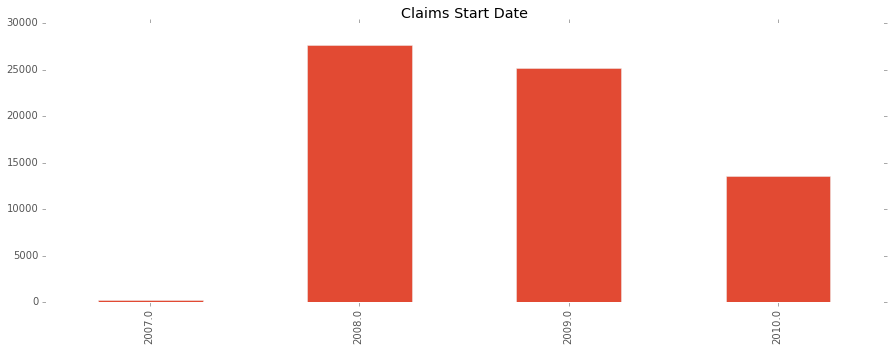

In [132]:
#Plot of Claims start date
df4['CLM_FROM_DT'].dt.year.value_counts().sort_index().plot(kind='bar',title= "Claims Start Date ",figsize=(15,5))

In [134]:
#Count of claims end date
df4['CLM_THRU_DT'].value_counts()

2008-05-29    108
2008-06-02    108
2008-10-18    106
2008-09-05    106
2008-05-27    103
2008-06-05    103
2008-08-22    102
2008-11-11    102
2008-10-25    101
2008-12-07    100
2008-09-21    100
2008-10-20    100
2008-07-21     99
2008-04-04     99
2008-05-07     98
...
2010-11-06    10
2010-12-21     9
2010-11-21     9
2010-12-12     9
2010-12-25     9
2010-10-19     9
2010-12-07     9
2010-12-02     8
2010-12-23     8
2010-12-17     7
2010-12-22     7
2010-12-11     6
2010-12-18     5
2010-12-13     5
2010-12-14     5
Length: 1096

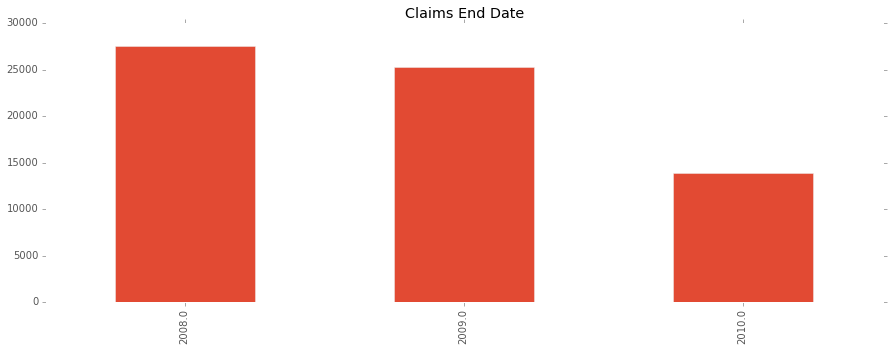

In [133]:
#Plot of claims end date
df4['CLM_THRU_DT'].dt.year.value_counts().sort_index().plot(kind='bar',title= "Claims End Date ",figsize=(15,5))

In [115]:
cd P:\Development\Angela\Synthetic claims data\DE1_0_2008_to_2010_Outpatient_Claims_Sample_1

P:\Development\Angela\Synthetic claims data\DE1_0_2008_to_2010_Outpatient_Claims_Sample_1


In [116]:
# Read in CSV file and place into dataframe 5
df5=pd.read_csv('DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv', chunksize=100000)

This serves as explanatory text